### ДЗ к лекции 6

На основе датасета из ноутбука проведите анализ данных и постройте зависимости частоты и среднего убытка от какого-либо параметра (за исключением уже выполненных в ноутбуке).

In [118]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('freMPL-R.csv', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343080 entries, 0 to 343079
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Exposure           343080 non-null  float64
 1   LicAge             343080 non-null  int64  
 2   RecordBeg          343080 non-null  object 
 3   RecordEnd          181115 non-null  object 
 4   VehAge             177880 non-null  object 
 5   Gender             343080 non-null  object 
 6   MariStat           343080 non-null  object 
 7   SocioCateg         343080 non-null  object 
 8   VehUsage           343080 non-null  object 
 9   DrivAge            343080 non-null  int64  
 10  HasKmLimit         343080 non-null  int64  
 11  BonusMalus         343080 non-null  int64  
 12  VehBody            145780 non-null  object 
 13  VehPrice           145780 non-null  object 
 14  VehEngine          145780 non-null  object 
 15  VehEnergy          145780 non-null  object 
 16  Ve

In [70]:
df.head()

,Exposure,LicAge,RecordBeg,RecordEnd,VehAge,Gender,MariStat,SocioCateg,VehUsage,DrivAge,...,ClaimInd,Dataset,DeducType,ClaimNbResp,ClaimNbNonResp,ClaimNbParking,ClaimNbFireTheft,ClaimNbWindscreen,OutUseNb,RiskArea
0,0.583,366,2004-06-01,NaN,2,Female,Other,CSP1,Professional,55,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.200,187,2004-10-19,NaN,0,Male,Alone,CSP55,Private+trip to office,34,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.083,169,2004-07-16,2004-08-16,1,Female,Other,CSP1,Professional,33,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.375,170,2004-08-16,NaN,1,Female,Other,CSP1,Professional,34,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.500,224,2004-01-01,2004-07-01,3,Male,Other,CSP47,Professional,53,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# Смотрим, какие факторы пропущены в каждом из датасетов

dct = {}
for i in range(1,11):
    _x = df.loc[df.Dataset == i].notnull().sum()
    dct[i] = list(_x[_x == 0].index)

print('Dataset  Missing Variables')
for x in range(1,11):
    print(x,'\t',dct[x])

Dataset  Missing Variables
1 	 ['DeducType', 'ClaimNbResp', 'ClaimNbNonResp', 'ClaimNbParking', 'ClaimNbFireTheft', 'ClaimNbWindscreen', 'OutUseNb', 'RiskArea']
2 	 ['DeducType', 'ClaimNbResp', 'ClaimNbNonResp', 'ClaimNbParking', 'ClaimNbFireTheft', 'ClaimNbWindscreen', 'OutUseNb', 'RiskArea']
3 	 ['ClaimNbResp', 'ClaimNbNonResp', 'ClaimNbParking', 'ClaimNbFireTheft', 'ClaimNbWindscreen', 'OutUseNb', 'RiskArea']
4 	 ['ClaimNbResp', 'ClaimNbNonResp', 'ClaimNbParking', 'ClaimNbFireTheft', 'ClaimNbWindscreen', 'OutUseNb', 'RiskArea']
5 	 ['VehAge', 'VehBody', 'VehPrice', 'VehEngine', 'VehEnergy', 'VehMaxSpeed', 'VehClass', 'RiskVar', 'Garage', 'DeducType']
6 	 ['VehAge', 'VehBody', 'VehPrice', 'VehEngine', 'VehEnergy', 'VehMaxSpeed', 'VehClass', 'RiskVar', 'Garage', 'DeducType']
7 	 ['VehAge', 'VehBody', 'VehPrice', 'VehEngine', 'VehEnergy', 'VehMaxSpeed', 'VehClass', 'RiskVar', 'Garage', 'DeducType']
8 	 ['VehAge', 'VehBody', 'VehPrice', 'VehEngine', 'VehEnergy', 'VehMaxSpeed', 'VehClass

In [72]:
# Объединяем наборы данных 5-9, удаляем пустые столбцы, удаляем дубликаты

df59 = df.loc[df.Dataset.isin([5, 6, 7, 8, 9])]
df59 = df59.drop(['Dataset'], axis=1)
df59 = df59.dropna(axis=1, how='all')
print('With duplicates\t\t', len(df59))
df59 = df59.drop_duplicates()
print('Without duplicates\t', len(df59))

With duplicates		 165200
Without duplicates	 115155


In [73]:
df59.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115155 entries, 145780 to 310979
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Exposure           115155 non-null  float64
 1   LicAge             115155 non-null  int64  
 2   RecordBeg          115155 non-null  object 
 3   RecordEnd          59455 non-null   object 
 4   Gender             115155 non-null  object 
 5   MariStat           115155 non-null  object 
 6   SocioCateg         115155 non-null  object 
 7   VehUsage           115155 non-null  object 
 8   DrivAge            115155 non-null  int64  
 9   HasKmLimit         115155 non-null  int64  
 10  BonusMalus         115155 non-null  int64  
 11  ClaimAmount        115155 non-null  float64
 12  ClaimInd           115155 non-null  int64  
 13  ClaimNbResp        115155 non-null  float64
 14  ClaimNbNonResp     115155 non-null  float64
 15  ClaimNbParking     115155 non-null  float64
 1

In [74]:
df = df59

In [75]:
# Вспомогательный столбец для суммирования числа полисов

df['PolicyCount'] = 1

In [76]:
# Вспомогательный столбец для суммирования числа полисов с убытками

df['ClaimCount'] = df['ClaimAmount'] > 0

In [77]:
# Вспомогательный столбец для суммирования числа полисов без убытков

df['NoClaimCount'] = df.PolicyCount - df.ClaimCount

In [97]:
df[['Exposure', 'PolicyCount','ClaimAmount', 'ClaimCount', 'NoClaimCount']].head()

,Exposure,PolicyCount,ClaimAmount,ClaimCount,NoClaimCount
145780,0.083,1,0.0,False,1
145781,0.916,1,0.0,False,1
145782,0.550,1,0.0,False,1
145783,0.089,1,0.0,False,1
145784,0.233,1,0.0,False,1


In [98]:
df.columns

Index(['Exposure', 'LicAge', 'RecordBeg', 'RecordEnd', 'Gender', 'MariStat',
       'SocioCateg', 'VehUsage', 'DrivAge', 'HasKmLimit', 'BonusMalus',
       'ClaimAmount', 'ClaimInd', 'ClaimNbResp', 'ClaimNbNonResp',
       'ClaimNbParking', 'ClaimNbFireTheft', 'ClaimNbWindscreen', 'OutUseNb',
       'RiskArea', 'PolicyCount', 'ClaimCount', 'NoClaimCount'],
      dtype='object')

In [125]:
def dependences_freq(df, auxiliary_features):
    assessed_f = df.drop(auxiliary_features,axis='columns')
    for f in assessed_f.columns:
        df_gf = df[auxiliary_features].groupby(df[f]).sum()
        df_gf = df_gf.reset_index()
        df_gf['Freq'] = df_gf.ClaimCount / df_gf.Exposure
        
        plt.figure(figsize=(20,4))
        plt.title(f'Распределение частоты от {f}')
        plt.bar(df_gf[f], df_gf['Freq'], label=f'Freq({f})')
        plt.xlabel(f)
        plt.ylabel('Freq')
        plt.legend()
        plt.show()

def dependences_avgClaim(df, auxiliary_features):
    assessed_f = df.drop(auxiliary_features,axis='columns')
    for f in assessed_f.columns:
        df_gf = df[auxiliary_features].groupby(df[f]).sum()
        df_gf = df_gf.reset_index()
        df_gf['AvgClaim'] = df_gf.ClaimAmount / df_gf.ClaimCount
        plt.figure(figsize=(20,4))
        plt.title(f'Зависимость среднего убытка от {f}')
        plt.bar(df_gf[f], df_gf['AvgClaim'], label=f'AvgClaim({f})')
        plt.xlabel(f)
        plt.ylabel('AvgClaim')
        plt.legend()
        plt.show()      

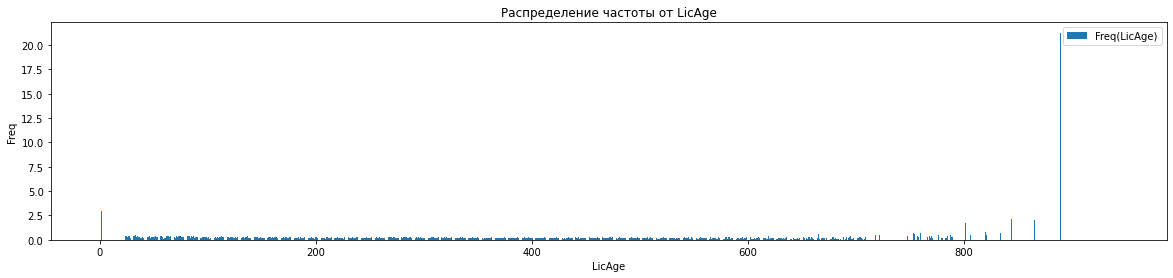

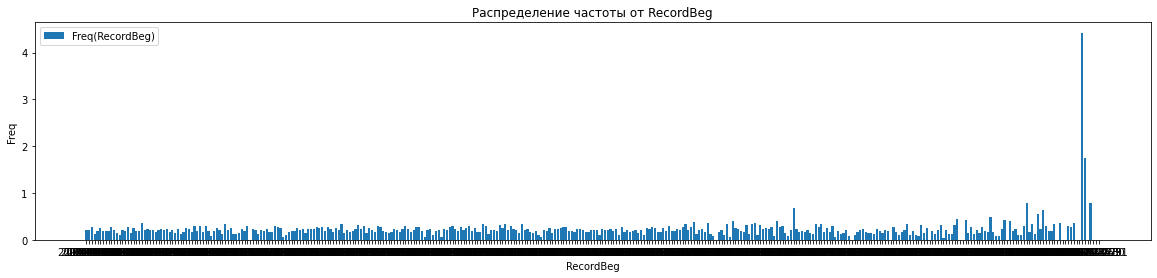

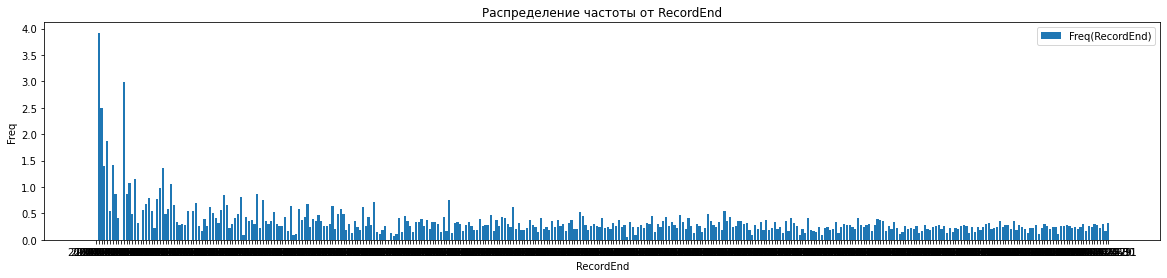

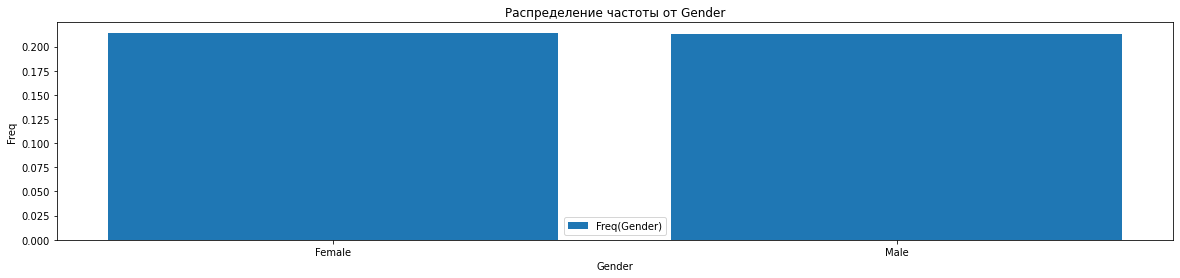

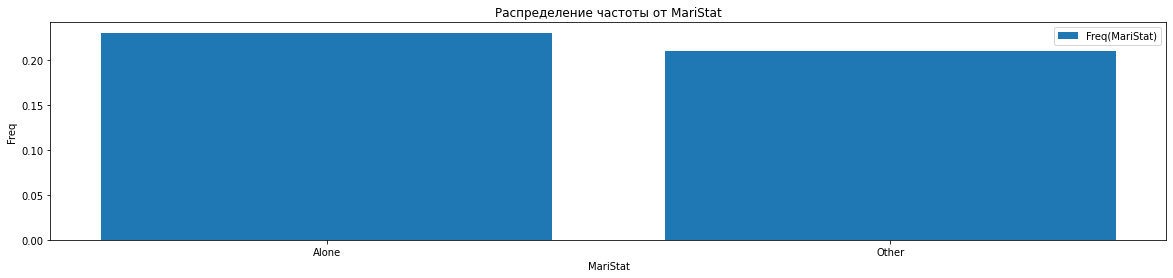

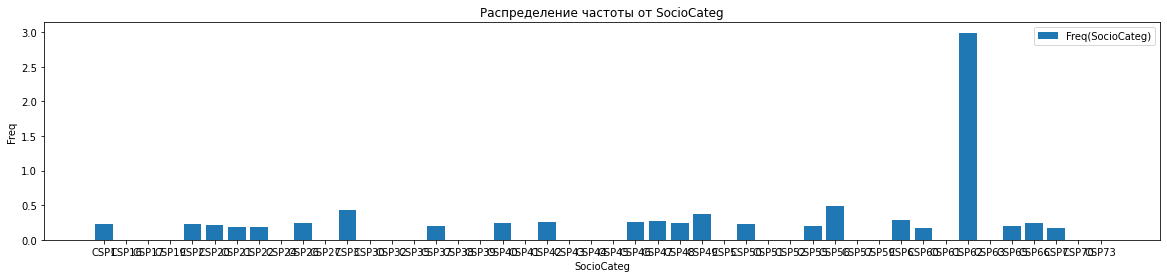

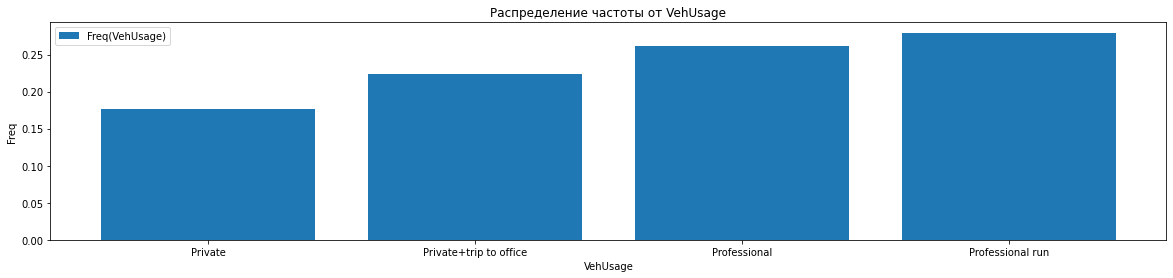

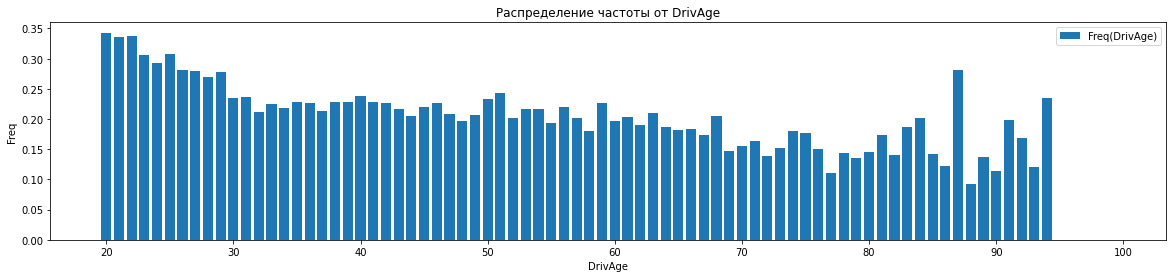

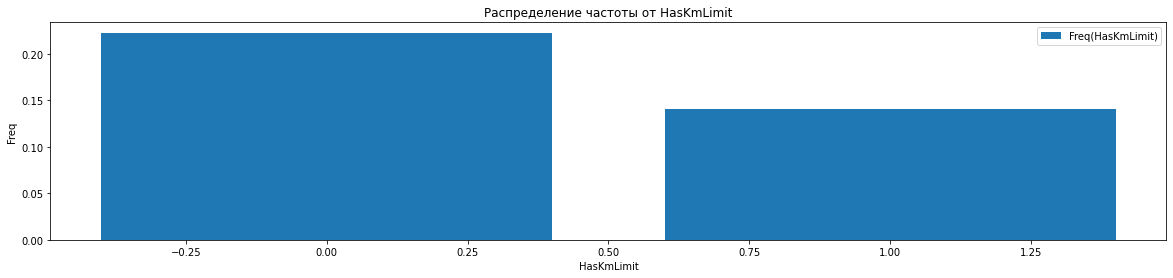

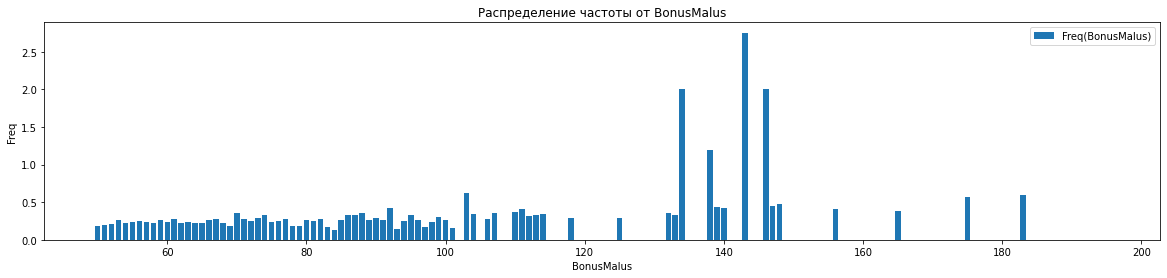

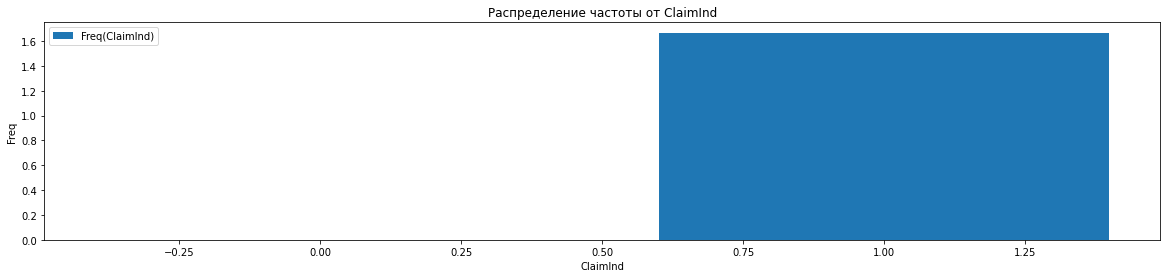

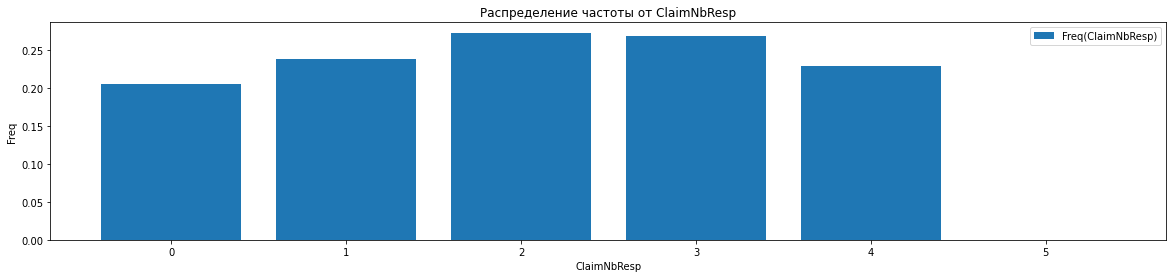

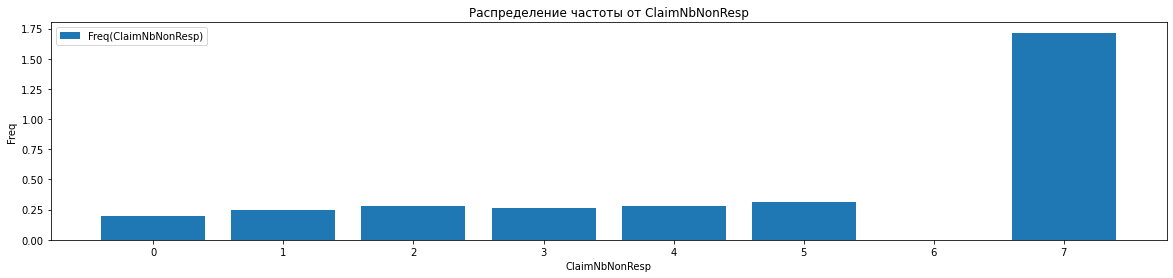

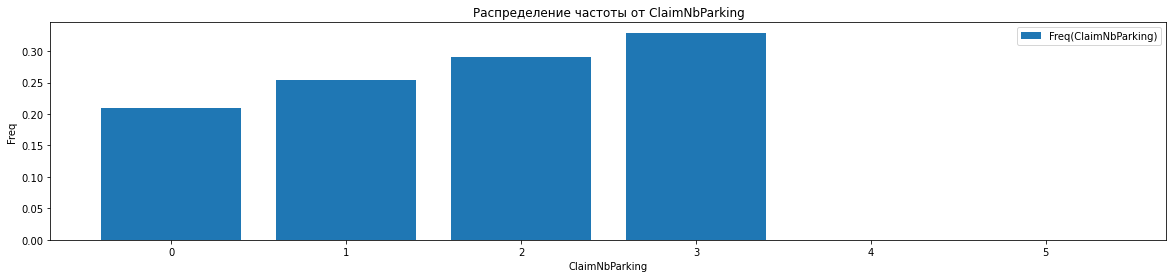

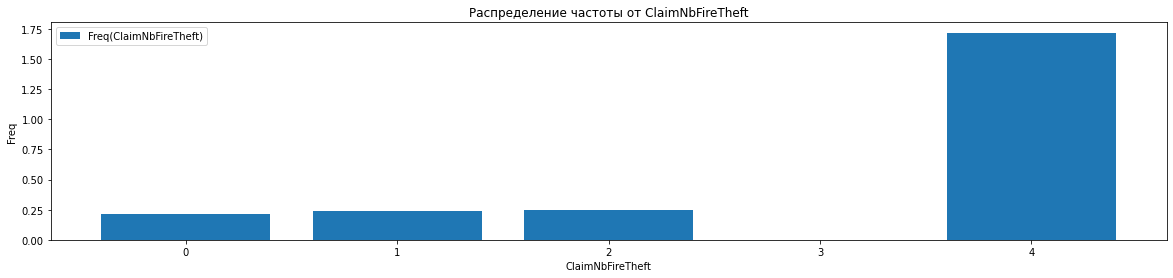

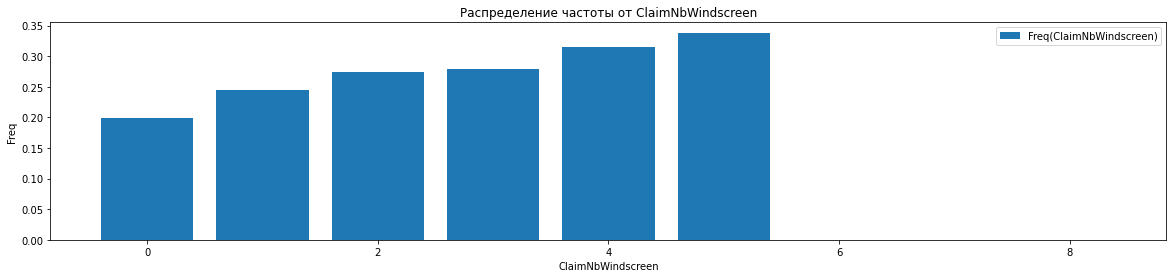

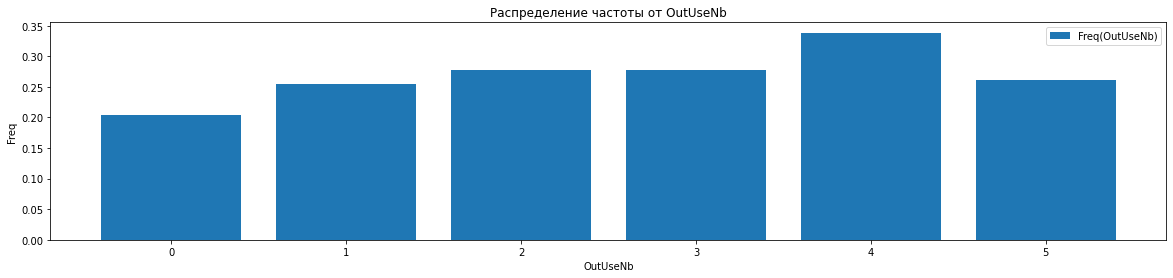

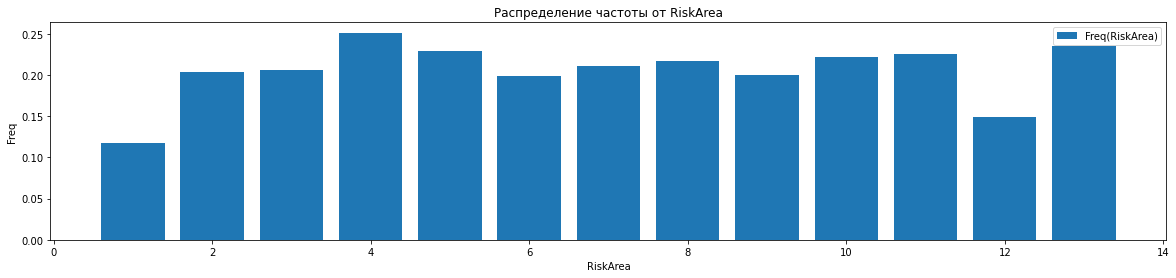

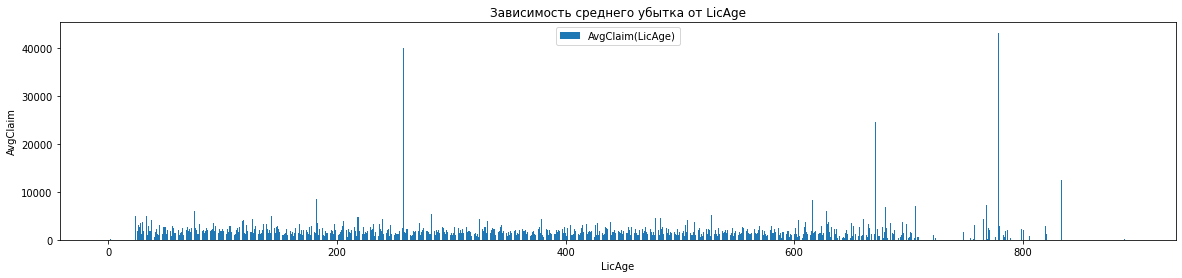

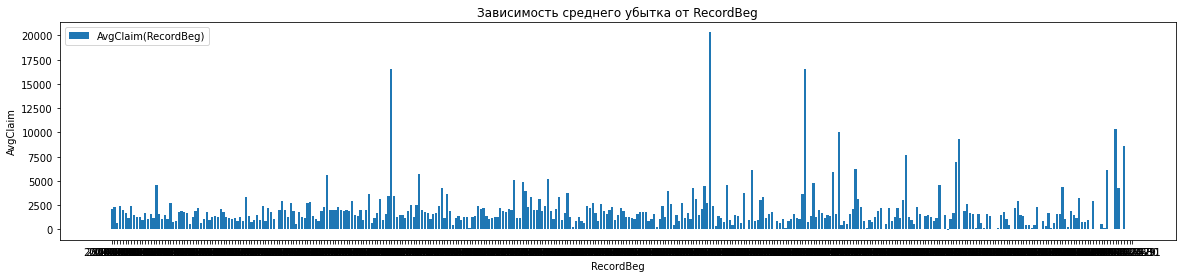

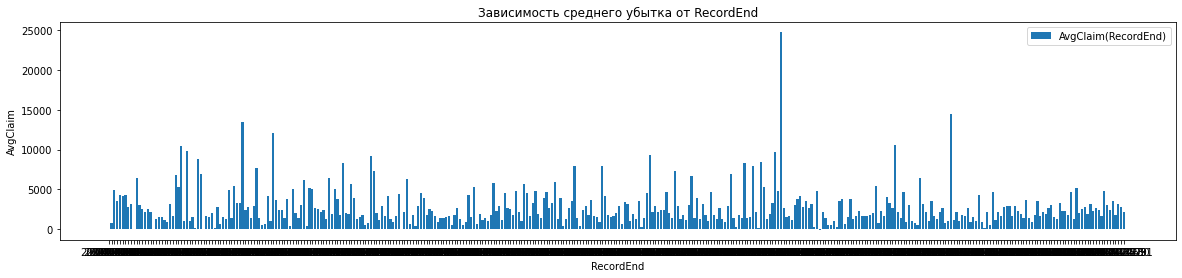

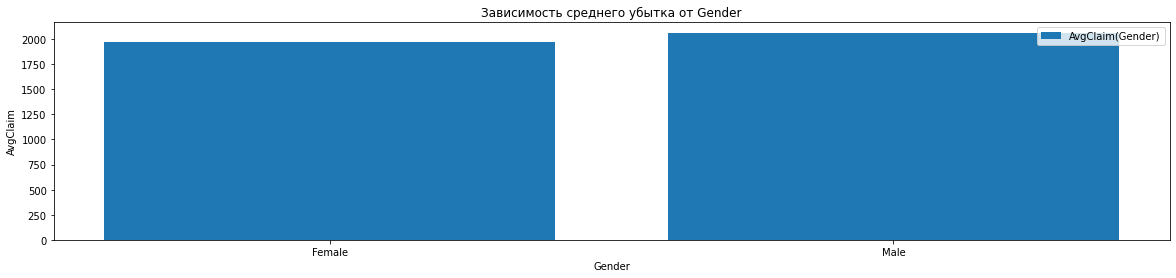

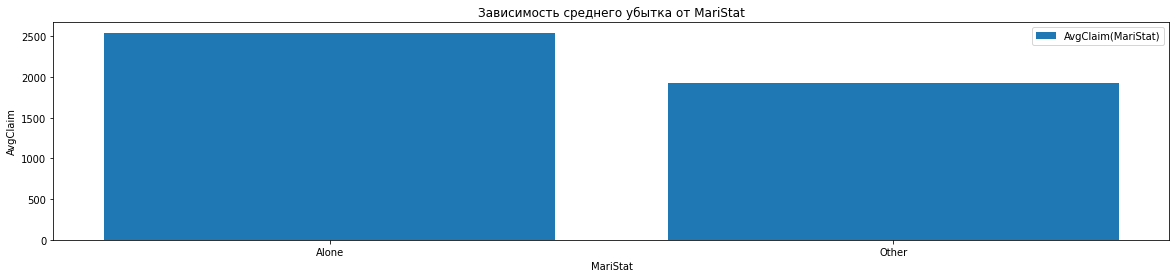

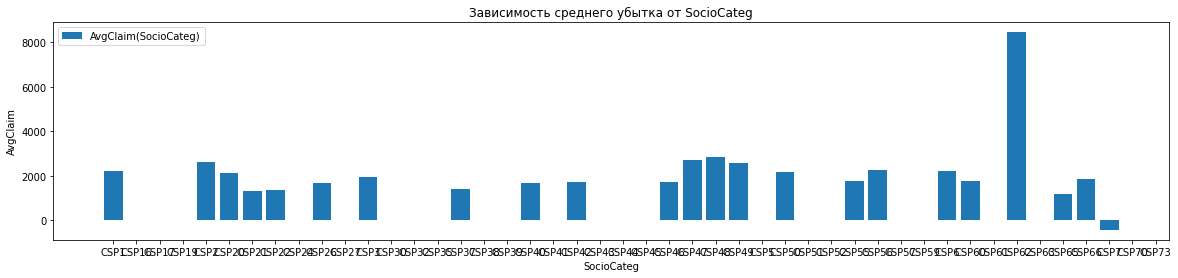

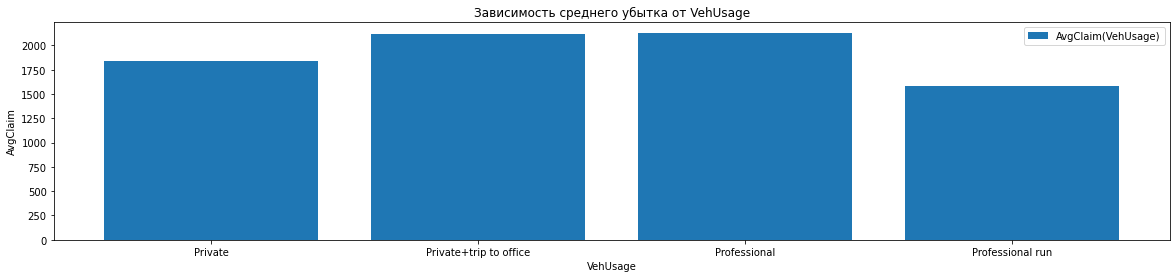

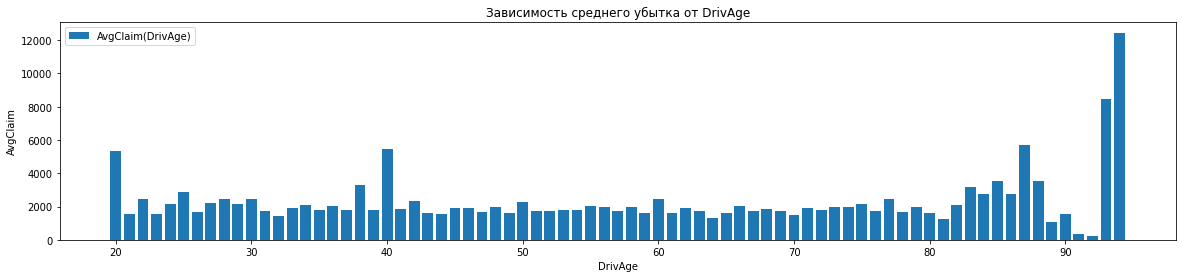

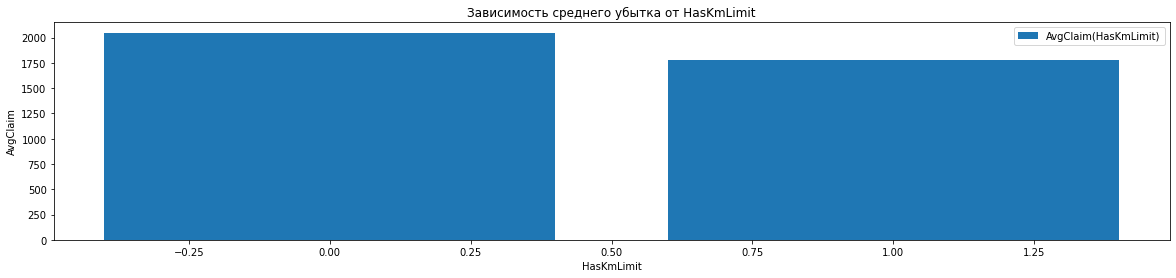

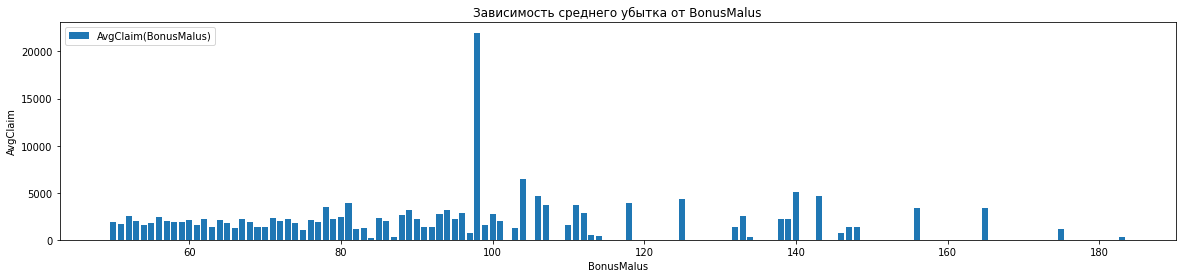

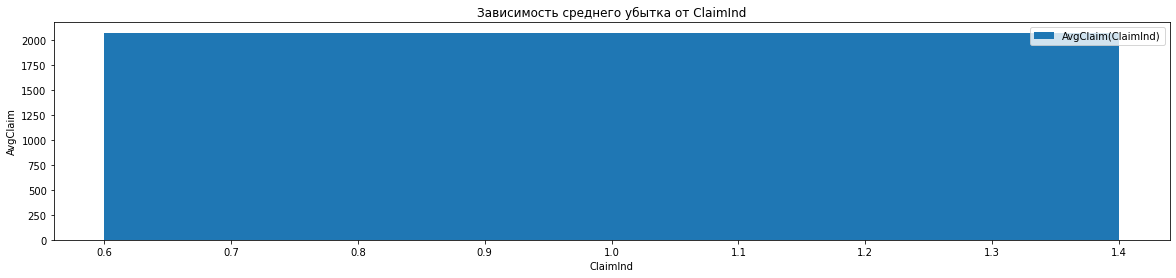

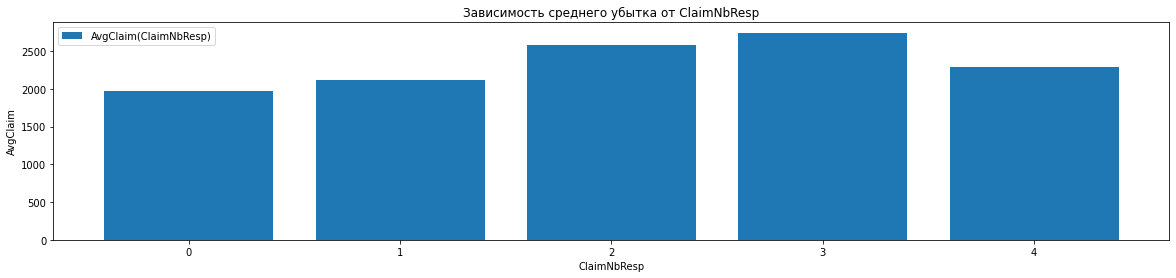

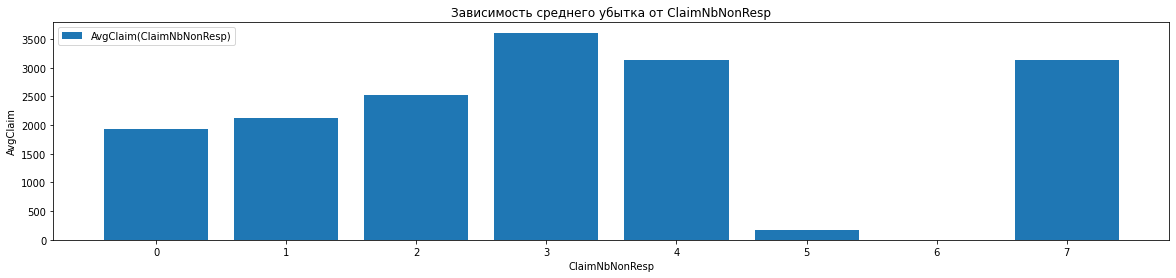

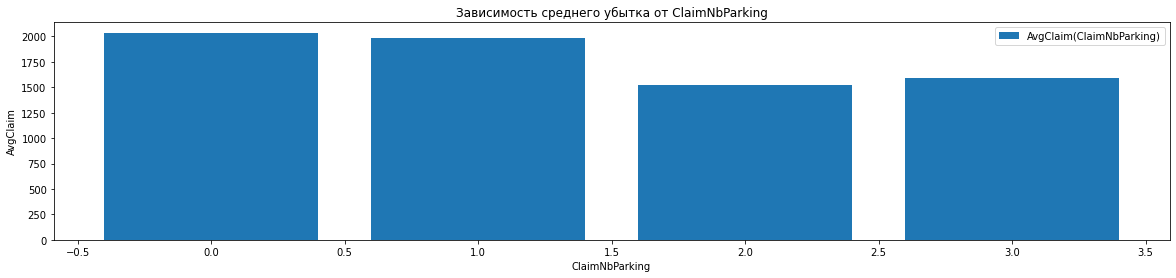

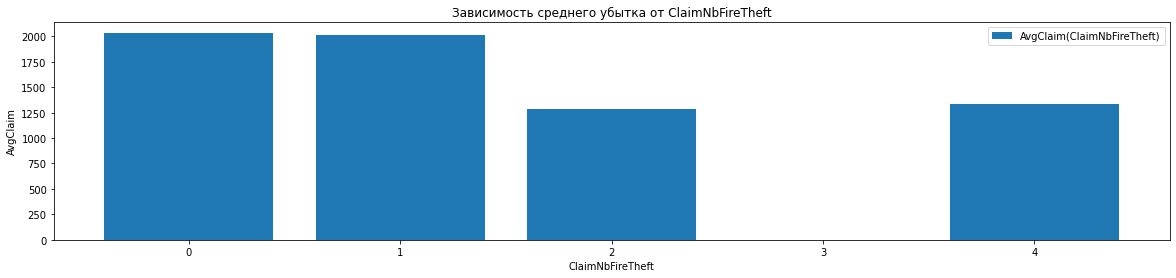

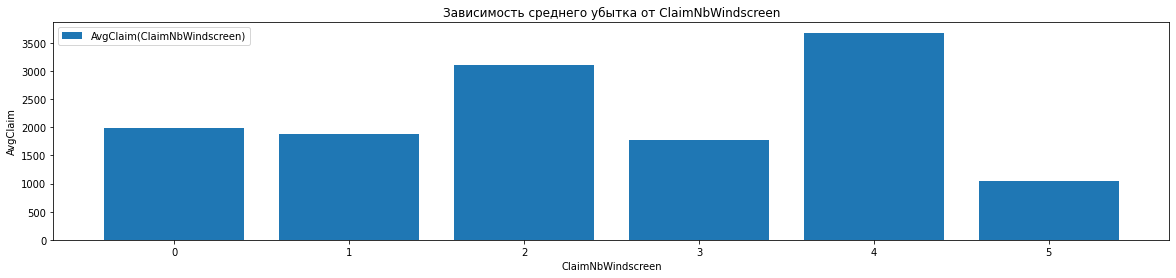

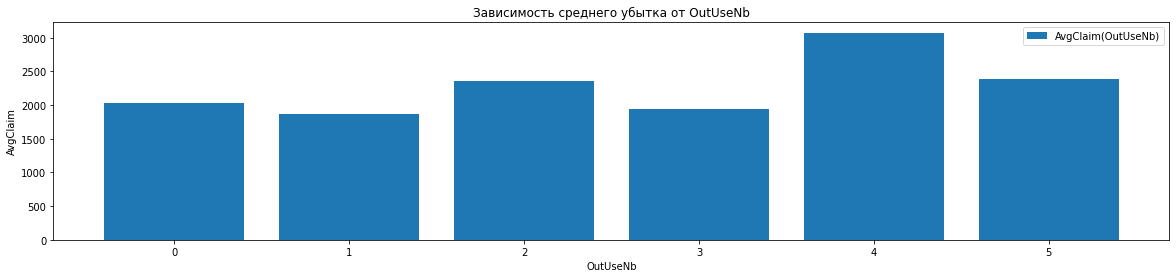

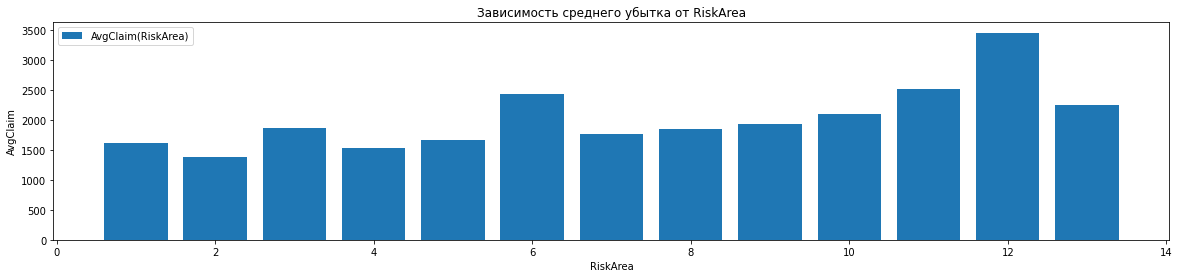

In [126]:
list_af = ['Exposure', 'PolicyCount','ClaimAmount', 'ClaimCount', 'NoClaimCount']
dependences_freq(df, list_af)
dependences_avgClaim(df, list_af)